# Tarea 17

Fecha de entrega: 26/Octubre/2017

Por _Diana López Angeles_

-----

In [1]:
using PyPlot

__Ejercicio 1:__ ¿Como podemos evaluar funciones en matrices?
__Hint:__ ¿que operaciones sabemos que estan bien definidas sobre matrices?

__Suma__:

Dadas dos matrices de la misma dimensión
$$A=(a_{ij})$$ $$B=(b_{ij})$$

Se define la matriz suma como: 
$$A+B=(a_{ij}+b_{ij})$$

La matriz suma se obtienen sumando los elementos de las dos matrices que ocupan la misma misma posición.

__Propiedades de la suma__:

    1) Interna:

    La suma de dos matrices de orden m x n es otra matriz dimensión m x n.

    2) Asociativa:

$$
A + (B + C) = (A + B) + C
$$

    3) Neutro aditivo:

$$
A + 0 = A
$$

    Donde 0 es la matriz nula de la misma dimensión que la matriz A.

    4) Elemento opuesto:

$$
A + (−A) = O
$$

    La matriz opuesta es aquella en que todos los elementos están cambiados de signo.

    5) Conmutativa:

$$
A + B = B + A
$$

__Producto escalar con una matriz:__

Dada una matriz $A=(aij)$ y un número real k, se define el producto de un número real por una matriz: a la matriz del mismo orden que A, en la que cada elemento está multiplicado por k.

$$
kA=(k a_{ij})
$$

__Producto de matrices:__

Dos matrices $A$ y $B$ son multiplicables si el número de columnas de $A$ coincide con el número de filas de $B$.

El elemento $c_{ij}$ de la matriz producto se obtiene multiplicando cada elemento de la fila $i$ de la matriz $A$ por cada elemento de la columna $j$ de la matriz $B$ y sumándolos.

__Propiedades del producto de matrices:__

    1)Asociativa:

$$
A · (B · C) = (A · B) · C
$$

    2)Elemento neutro:

$$
A · I = A
$$

    Donde I es la matriz identidad del mismo orden que la matriz A.

    3)No es Conmutativa:

$$
A · B ≠ B · A
$$

    4)Distributiva del producto respecto de la suma:

$$
A · (B + C) = A · B + A · C
$$

__Ejercicio 2:__ ¿Como se define una matriz simétrica?

De Algebra lineal de tercer semestre sabemos que una matriz simetrica se define como:
$$
A = A^t
$$

Es decir, una matriz es simetrica si y solo si es igual a su transpuesta.

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Para poder hacer una matriz simetrica a partir de cualquier cuadrada basta con diagonalizarla. Entonces recordemos nuestro curso de Algebra lineal:

__Definición__:

Sea $A$ ∈ $R^{n×n}$, se dice que A es diagonalizable ⇔ $A$ es semejante a una matriz diagonal ⇔ ∃ $P ∈ R^{n×n}$ inversible tal que $P^-1AP =D$ diagonal.

__Condiciones que debe cumplir:__

Una matriz real cuadrada de orden n es diagonalizable si y sólo si tiene $n$ vectores propios linealmente independientes asociados a valores propios reales.

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.
* Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.

__Nota 1:__ De momento no utilicen `expm`.

__Nota 2:__ El operador `*` funciona para multiplicar matrices.

__Note 3:__ Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

In [2]:
A = [-1 1;-1 -1];                           #Nuestra matriz
eigen_valores=eigvals(A);                   #Nuestros eigenvalores de la matriz A
matriz_diagonal=diagm(eigen_valores);       #Matriz diagonal cuyas entradas son eigenvalores de A
matriz_eigenvalores = eigvecs(A);           #Matriz cuyas columnas son los eigenvectores de la matriz A.

In [3]:
eA(t) = matriz_eigenvalores*diagm(exp.(eigen_valores*t))*inv(matriz_eigenvalores);

In [4]:
E(t,x0) = matriz_eigenvalores*diagm(exp.(eigen_valores*t))*inv(matriz_eigenvalores)*x0;

In [14]:
t1 =  linspace(0,15,100);

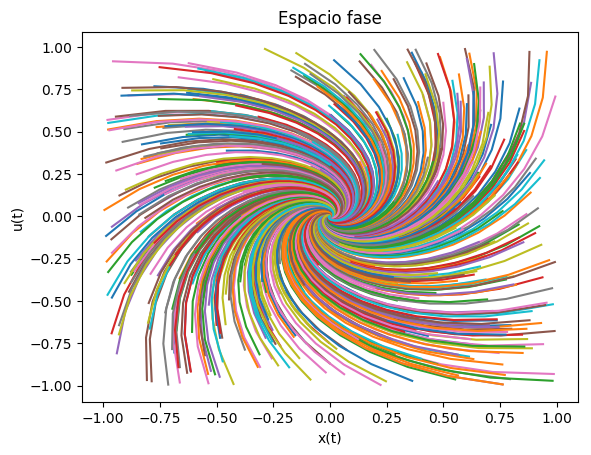

In [16]:
for i in 1:500    
    X = []
    xr = [2*rand()-1; 2*rand()-1]
 
    for k in 1:length(t1)
        e = E(t1[k], xr)
        push!(X,e)
    end

    listx=map(x->x[1],real(X))
    listu=map(x->x[2],real(X))
    plot(listx,listu)
end
title("Espacio fase")
xlabel("x(t)")
ylabel("u(t)")

show()